<a href="https://colab.research.google.com/github/be1le/machine-learning/blob/main/preferance_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] =  # username
os.environ['KAGGLE_KEY'] =  # key

In [ ]:
!kaggle datasets download -d vijayashreer/food-preferences

  0% 0.00/3.31k [00:00<?, ?B/s]
100% 3.31k/3.31k [00:00<00:00, 5.45MB/s]


In [ ]:
!unzip -q food-preferences.zip # -q 옵션 으로 조용히 풀어낸다 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #다항논리회귀에는 원핫 인코더를 임포트 해와야 한다.  

In [ ]:
df = pd.read_csv('Food_Preference.csv', usecols=[
  'Age', # 
  'Gender', #  
  'Juice',
  'Dessert',
  'Food'
])

df.head(5)

,Gender,Age,Food,Juice,Dessert
0,Male,24,Traditional food,Fresh Juice,Maybe
1,Female,22,Western Food,Carbonated drinks,Yes
2,Male,31,Western Food,Fresh Juice,Maybe
3,Female,25,Traditional food,Fresh Juice,Maybe
4,Male,27,Traditional food,Fresh Juice,Maybe


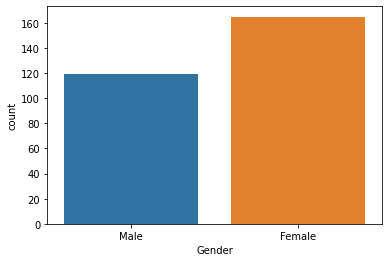

In [ ]:
sns.countplot(x=df['Gender'])

In [ ]:
print(df.isnull().sum())

Gender     4
Age        0
Food       0
Juice      0
Dessert    0
dtype: int64


In [ ]:
print(len(df))

df = df.dropna() #이함수로 지워주는 것이다. 

print(len(df))

288
284


In [ ]:
df=pd.get_dummies(df,columns=['Age','Juice','Dessert','Food','Gender'])

In [ ]:
print(df)

     Age_8  Age_9  Age_12  ...  Food_Western Food  Gender_Female  Gender_Male
0        0      0       0  ...                  0              0            1
1        0      0       0  ...                  1              1            0
2        0      0       0  ...                  1              0            1
3        0      0       0  ...                  0              1            0
4        0      0       0  ...                  0              0            1
..     ...    ...     ...  ...                ...            ...          ...
283      0      0       0  ...                  1              0            1
284      0      0       0  ...                  0              0            1
285      0      0       0  ...                  0              0            1
286      0      0       0  ...                  0              0            1
287      0      0       0  ...                  0              0            1

[284 rows x 58 columns]


In [ ]:
x_data = df.drop(columns=['Gender_Female','Gender_Male'], axis=1) # 
x_data = x_data.astype(np.float32)

x_data.head(5)

,Age_8,Age_9,Age_12,Age_13,Age_15,Age_16,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_49,Age_50,Age_51,Age_53,Age_54,Age_56,Age_59,Age_60,Age_63,Age_65,Age_67,Age_74,Age_80,Juice_Carbonated drinks,Juice_Fresh Juice,Dessert_Maybe,Dessert_No,Dessert_Yes,Food_Traditional food,Food_Western Food
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y_data = df[['Gender_Female','Gender_Male']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,Gender_Female,Gender_Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data) # 이게표준화 하는거

print(x_data.values[0])
print(x_data_scaled[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0.]
[-0.05944383 -0.10332549 -0.05944383 -0.11952286 -0.05944383 -0.08421519
 -0.05944383 -0.10332549 -0.19104019 -0.1589678  -0.20073126 -0.19104019
 -0.21902163  3.6331804  -0.29685453 -0.20073126 -0.25232998 -0.22771002
 -0.14691062 -0.22771002 -0.1589678  -0.11952286 -0.1809068  -0.17025131
 -0.1589678  -0.13386989 -0.17025131 -0.20073126 -0.14691062 -0.21004201
 -0.13386989 -0.05944383 -0.05944383 -0.11952286 -0.05944383 -0.08421519
 -0.05944383 -0.10332549 -0.05944383 -0.05944383 -0.11952286 -0.08421519
 -0.05944383 -0.08421519 -0.05944383 -0.05944383 -0.05944383 -0.05944383
 -0.08421519 -0.3563483   0.3563483   1.152332   -0.47343206 -0.7950999
  0.46225017 -0.46225017]


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(227, 56) (57, 56)
(227, 2) (57, 2)


In [ ]:
model = Sequential([
  Dense(2, activation='sigmoid') #엑티베이션이라는 아규먼트에 시그모이드를 넣어주면 시그모이드 함수를 실행하게된다.
])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1), metrics=['acc']) #로스값만으로는 감을못잡아서.acc을쓴다.
#시그모이드랑 코스트펑션이 바이너리 크로샌트로피를 사용한다느점.
model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
8/8 [==============================] - 1s 46ms/step - loss: 1.1250 - acc: 0.6432 - val_loss: 1.5668 - val_acc: 0.4211
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 1.0150 - acc: 0.6740 - val_loss: 1.7197 - val_acc: 0.5614
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 0.6879 - acc: 0.7093 - val_loss: 1.6223 - val_acc: 0.4211
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 0.7189 - acc: 0.7093 - val_loss: 1.7829 - val_acc: 0.5263
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 0.7305 - acc: 0.7004 - val_loss: 1.6523 - val_acc: 0.4737
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 0.8388 - acc: 0.6872 - val_loss: 1.5121 - val_acc: 0.4737
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.9322 - acc: 0.6211 - val_loss: 1.5799 - val_acc: 0.5614
Epoch 8/20
8/8 [==============================] - 0s 8ms/step - loss: 0.9893 - acc: 0.6564 - val_loss: 